In [1308]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [1309]:
# Загружаем данные о инсультах
stroke_data = pd.read_csv("stroke_data.csv")

In [1310]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [1311]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [1312]:
# Преобразуем категориальные признаки в числовые значения
stroke_data['gender'] = stroke_data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
stroke_data['ever_married'] = stroke_data['ever_married'].map({'No': 0, 'Yes': 1})
stroke_data['work_type'] = stroke_data['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})
stroke_data['Residence_type'] = stroke_data['Residence_type'].map({'Rural': 0, 'Urban': 1})
stroke_data['smoking_status'] = stroke_data['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

In [1313]:
# Заполняем пропущенные значения
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace=True)

In [1314]:
corr = stroke_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,-0.001406,0.003538,0.003550,-0.001296,0.013690,-0.018030,-0.001403,0.001092,0.002999,-0.018551,0.006388
gender,-0.001406,1.000000,0.027300,-0.021390,-0.085749,0.029366,-0.066212,0.005529,-0.054213,0.025110,-0.039693,-0.009200
age,0.003538,0.027300,1.000000,0.276398,0.263796,0.679125,-0.413270,0.014180,0.238171,0.325942,-0.375845,0.245257
hypertension,0.003550,-0.021390,0.276398,1.000000,0.108306,0.164243,-0.075097,-0.007913,0.174474,0.160189,-0.129012,0.127904
heart_disease,-0.001296,-0.085749,0.263796,0.108306,1.000000,0.114644,-0.058263,0.003092,0.161857,0.038899,-0.064671,0.134914
ever_married,0.013690,0.029366,0.679125,0.164243,0.114644,1.000000,-0.375944,0.006261,0.155068,0.335705,-0.303694,0.108340
work_type,-0.018030,-0.066212,-0.413270,-0.075097,-0.058263,-0.375944,1.000000,0.014573,-0.068135,-0.341973,0.307774,-0.058224
Residence_type,-0.001403,0.005529,0.014180,-0.007913,0.003092,0.006261,0.014573,1.000000,-0.004946,-0.000120,0.004656,0.015458
avg_glucose_level,0.001092,-0.054213,0.238171,0.174474,0.161857,0.155068,-0.068135,-0.004946,1.000000,0.168751,-0.097732,0.131945
bmi,0.002999,0.025110,0.325942,0.160189,0.038899,0.335705,-0.341973,-0.000120,0.168751,1.000000,-0.230553,0.038947


In [1315]:
# Выбираем признаки для обучения модели
features = stroke_data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
target = stroke_data['stroke']

In [1316]:
# Разделяем данные на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=17)

In [1317]:
# Создаем модель нейронной сети
stroke_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Компилируем модель
stroke_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.binary_crossentropy, "accuracy"])

# Создаем обратный вызов для изменения скорости обучения
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/15)))

# Обучаем модель
history = stroke_model.fit(features_train, target_train, epochs=50, verbose=1,  callbacks=[lr_callback])

Epoch 1/50


120/120 [==============================] - 1s 824us/step - loss: 1.5800 - binary_crossentropy: 1.5800 - accuracy: 0.3674 - lr: 1.0000e-04
Epoch 2/50
120/120 [==============================] - 0s 798us/step - loss: 0.3165 - binary_crossentropy: 0.3165 - accuracy: 0.8844 - lr: 1.1659e-04
Epoch 3/50
120/120 [==============================] - 0s 790us/step - loss: 0.2265 - binary_crossentropy: 0.2265 - accuracy: 0.9512 - lr: 1.3594e-04
Epoch 4/50
120/120 [==============================] - 0s 790us/step - loss: 0.2173 - binary_crossentropy: 0.2173 - accuracy: 0.9515 - lr: 1.5849e-04
Epoch 5/50
120/120 [==============================] - 0s 807us/step - loss: 0.2128 - binary_crossentropy: 0.2128 - accuracy: 0.9515 - lr: 1.8478e-04
Epoch 6/50
120/120 [==============================] - 0s 798us/step - loss: 0.2079 - binary_crossentropy: 0.2079 - accuracy: 0.9515 - lr: 2.1544e-04
Epoch 7/50
120/120 [==============================] - 0s 798us/step - loss: 0.2029 - binary_crossentropy: 0.2029 - ac

<Axes: >

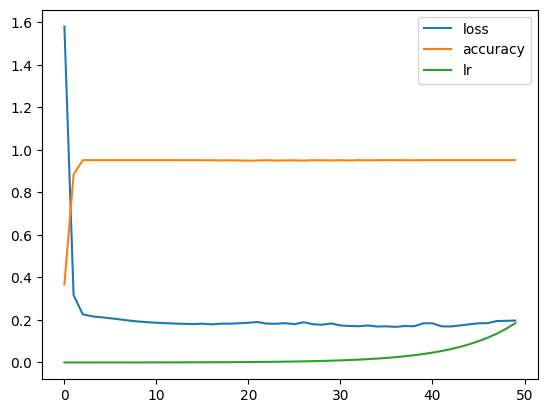

In [1318]:
history = pd.DataFrame(history.history).drop("binary_crossentropy", axis=1)
history.plot()

In [1319]:
# Создаем модель нейронной сети
stroke_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Компилируем модель с определенной скоростью обучения
stroke_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0097), metrics=[tf.keras.metrics.binary_crossentropy, "accuracy"])

# Обучаем модель
history = stroke_model.fit(features_train, target_train, epochs=15, verbose=1)

Epoch 1/15
120/120 [==============================] - 1s 931us/step - loss: 0.2610 - binary_crossentropy: 0.2610 - accuracy: 0.9475
Epoch 2/15
120/120 [==============================] - 0s 798us/step - loss: 0.1972 - binary_crossentropy: 0.1972 - accuracy: 0.9496
Epoch 3/15
120/120 [==============================] - 0s 824us/step - loss: 0.1859 - binary_crossentropy: 0.1859 - accuracy: 0.9504
Epoch 4/15
120/120 [==============================] - 0s 815us/step - loss: 0.1813 - binary_crossentropy: 0.1813 - accuracy: 0.9512
Epoch 5/15
120/120 [==============================] - 0s 790us/step - loss: 0.1824 - binary_crossentropy: 0.1824 - accuracy: 0.9509
Epoch 6/15
120/120 [==============================] - 0s 798us/step - loss: 0.1790 - binary_crossentropy: 0.1790 - accuracy: 0.9515
Epoch 7/15
120/120 [==============================] - 0s 866us/step - loss: 0.1730 - binary_crossentropy: 0.1730 - accuracy: 0.9515
Epoch 8/15
120/120 [==============================] - 0s 807us/step - loss: 

In [1320]:
# Сохраняем модель
stroke_model.save("stroke_model.h5")

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1321]:
# Загружаем модель
loaded_model = keras.models.load_model("stroke_model.h5")

40/40 [==============================] - 0s 641us/step


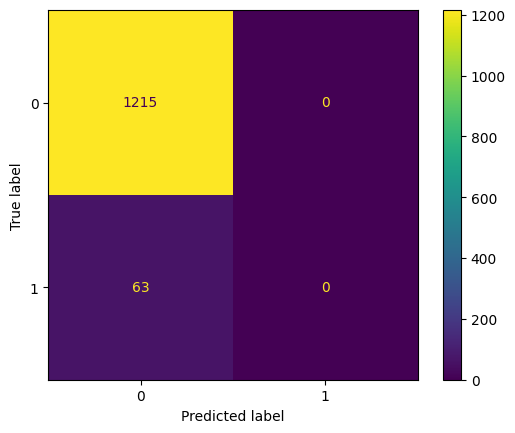

In [1322]:
# Предсказываем значения для тестовой выборки
predicted_values = np.round(loaded_model.predict(features_test)[:, 0])
# Выводим матрицу ошибок
ConfusionMatrixDisplay.from_predictions(y_true=target_test, y_pred=predicted_values)

In [1323]:
# Функция для расчета метрик
def calculate_metrics(true_values, predicted_values):
    f1 = f1_score(true_values, predicted_values)
    rec = recall_score(true_values, predicted_values)
    acc = accuracy_score(true_values, predicted_values)
    prec = precision_score(true_values, predicted_values)
    return f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1: {f1}"  


In [1324]:
# Выводим метрики
calculate_metrics(target_test, predicted_values)

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'Accuracy: 0.9507042253521126, Precision: 0.0, Recall: 0.0, F1: 0.0'

**В ходе выполнения этой лабораторной работы я приобрел ценные навыки и знания в области машинного обучения и анализа данных.**
**Вот некоторые из них:**

   **- Создавать модели нейронной сети с помощью TensorFlow и Keras, а также обучать эти модели.**
 
   **- Преобразовывать категориальные признаки в числовые и обрабатывать пропущенные значения.**
    
**Полученные результаты можно использовать для прогнозирования инсультов на основе данных о пациентах. Это может быть полезно в медицинской практике для раннего выявления риска инсульта и проведения профилактических мер.**